In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import time

In [40]:

# Создаем синтетические данные e-commerce

# Параметры
n_users = 1000
n_products = 50
n_categories = 5  # скрытые категории товаров

# 1. Создаем скрытые паттерны покупок (латентные факторы)
# Каждый пользователь имеет предпочтения к определенным категориям
user_preferences = np.random.dirichlet([1]*n_categories, size=n_users)

In [41]:
# 2. Создаем принадлежность товаров к категориям
product_categories = np.random.rand(n_products, n_categories)
# Нормализуем, чтобы сумма по строкам = 1
product_categories = product_categories / product_categories.sum(axis=1, keepdims=True)

# 3. Генерируем матрицу покупок
# Базовые покупки = предпочтения пользователя × категории товаров
base_purchases = user_preferences @ product_categories.T

# Добавляем шум и масштабируем
purchase_matrix = np.random.poisson(base_purchases * 10)  # имитация количества покупок

# Добавляем некоторые специфические паттерны
# Паттерн 1: "Электроника + гаджеты"
purchase_matrix[:200, [0, 5, 10, 15]] += np.random.poisson(3, size=(200, 4))

# Паттерн 2: "Книги + канцелярия"
purchase_matrix[200:400, [20, 25, 30, 35]] += np.random.poisson(4, size=(200, 4))

# Паттерн 3: "Одежда + аксессуары"
purchase_matrix[400:600, [40, 42, 44, 46]] += np.random.poisson(5, size=(200, 4))

print(f"Размер матрицы покупок: {purchase_matrix.shape}")
print(f"Среднее количество покупок на пользователя: {purchase_matrix.mean():.2f}")
print(f"Процент нулей (разреженность): {(purchase_matrix == 0).mean()*100:.1f}%")

Размер матрицы покупок: (1000, 50)
Среднее количество покупок на пользователя: 2.21
Процент нулей (разреженность): 14.3%


In [42]:

# Создаем DataFrame для наглядности
product_names = [f"Product_{i:03d}" for i in range(n_products)]
user_ids = [f"User_{i:04d}" for i in range(n_users)]

df_purchases = pd.DataFrame(purchase_matrix, 
                           index=user_ids, 
                           columns=product_names)

df_purchases.head(9)

,Product_000,Product_001,Product_002,Product_003,Product_004,Product_005,Product_006,Product_007,Product_008,Product_009,...,Product_040,Product_041,Product_042,Product_043,Product_044,Product_045,Product_046,Product_047,Product_048,Product_049
User_0000,6,3,1,2,3,4,3,2,2,3,...,2,3,0,2,2,1,2,2,1,5
User_0001,6,1,2,1,3,5,3,0,6,3,...,1,1,0,3,1,2,1,5,2,2
User_0002,5,4,5,4,3,5,1,4,2,0,...,7,3,3,2,1,2,4,0,4,4
User_0003,5,3,1,1,2,4,1,2,5,1,...,0,1,1,2,3,2,0,2,2,2
User_0004,5,3,0,4,2,7,3,0,1,1,...,0,1,1,2,4,4,7,1,2,0
User_0005,6,2,0,2,4,6,0,3,3,1,...,2,1,0,2,3,2,4,1,2,3
User_0006,4,5,3,1,3,5,1,0,2,3,...,2,3,5,1,2,2,1,4,1,3
User_0007,4,4,2,2,2,4,1,4,2,1,...,3,5,0,3,2,3,1,2,0,6
User_0008,4,1,3,1,1,3,2,4,0,3,...,0,3,2,1,1,0,0,1,5,4


In [43]:
# 4. Применяем PCA через собственные векторы
print("ШАГ 1: Центрирование данных")
scaler = StandardScaler(with_std=False)  # только центрирование
X_centered = scaler.fit_transform(purchase_matrix)
X_centered

ШАГ 1: Центрирование данных


array([[ 3.317,  1.067, -1.034, ...,  0.034, -0.969,  3.043],
       [ 3.317, -0.933, -0.034, ...,  3.034,  0.031,  0.043],
       [ 2.317,  2.067,  2.966, ..., -1.966,  2.031,  2.043],
       ...,
       [ 1.317,  0.067, -2.034, ...,  1.034,  1.031, -0.957],
       [-2.683, -0.933, -1.034, ...,  0.034,  0.031, -1.957],
       [-1.683, -0.933, -2.034, ..., -1.966,  2.031,  0.043]])

In [44]:
print("ШАГ 2: Вычисление ковариационной матрицы")
# Для больших данных вычисляем XᵀX эффективно
cov_matrix = X_centered.T @ X_centered / (n_users - 1)
print(f"Ковариационная матрица: {cov_matrix.shape}")

ШАГ 2: Вычисление ковариационной матрицы
Ковариационная матрица: (50, 50)


In [45]:
cov_matrix[0][:10]

array([ 4.80131231, -0.04828729,  0.23601401, -0.16124224,  0.07448348,
        1.44723524,  0.08125125,  0.30002603, -0.13745145, -0.28565465])

In [46]:
print("ШАГ 3: Находим собственные значения и векторы")
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
print(eigenvalues[:3])
print(eigenvectors[0][:10])

ШАГ 3: Находим собственные значения и векторы
[1.26251558 1.35942846 1.39845982]
[ 0.06665638 -0.15836255  0.03522793  0.02294334  0.0305397  -0.07109691
 -0.04647148  0.14960604  0.00943133  0.11749492]


In [47]:
# Сортируем по убыванию собственных значений
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print("Топ-5 собственных значений:")
for i in range(min(5, len(eigenvalues))):
    print(f"λ{i+1} = {eigenvalues[i]:.2f} "
          f"({eigenvalues[i]/eigenvalues.sum()*100:.1f}% дисп)")

Топ-5 собственных значений:
λ1 = 21.79 (14.0% дисп)
λ2 = 13.90 (9.0% дисп)
λ3 = 7.78 (5.0% дисп)
λ4 = 5.62 (3.6% дисп)
λ5 = 5.13 (3.3% дисп)


In [48]:
print("ШАГ 4: Выбираем количество компонент")
# Правило Кайзера: оставляем компоненты с λ > 1
# Или объясняем 80-90% дисперсии
cumulative_variance = np.cumsum(eigenvalues) / eigenvalues.sum()
n_components = np.where(cumulative_variance > 0.8)[0][0] + 1
print(f"Выбрано {n_components} компонент (объясняют {cumulative_variance[n_components-1]*100:.1f}% дисперсии)")

ШАГ 4: Выбираем количество компонент
Выбрано 32 компонент (объясняют 81.1% дисперсии)


In [49]:
# 5. Проецируем данные на главные компоненты
principal_components = eigenvectors[:, :n_components]
X_reduced = X_centered @ principal_components

print(f"Уменьшение размерности: {purchase_matrix.shape[1]} → {n_components} признаков")
print(f"Сжатие данных: {(1 - n_components/purchase_matrix.shape[1])*100:.1f}%")

Уменьшение размерности: 50 → 32 признаков
Сжатие данных: 36.0%


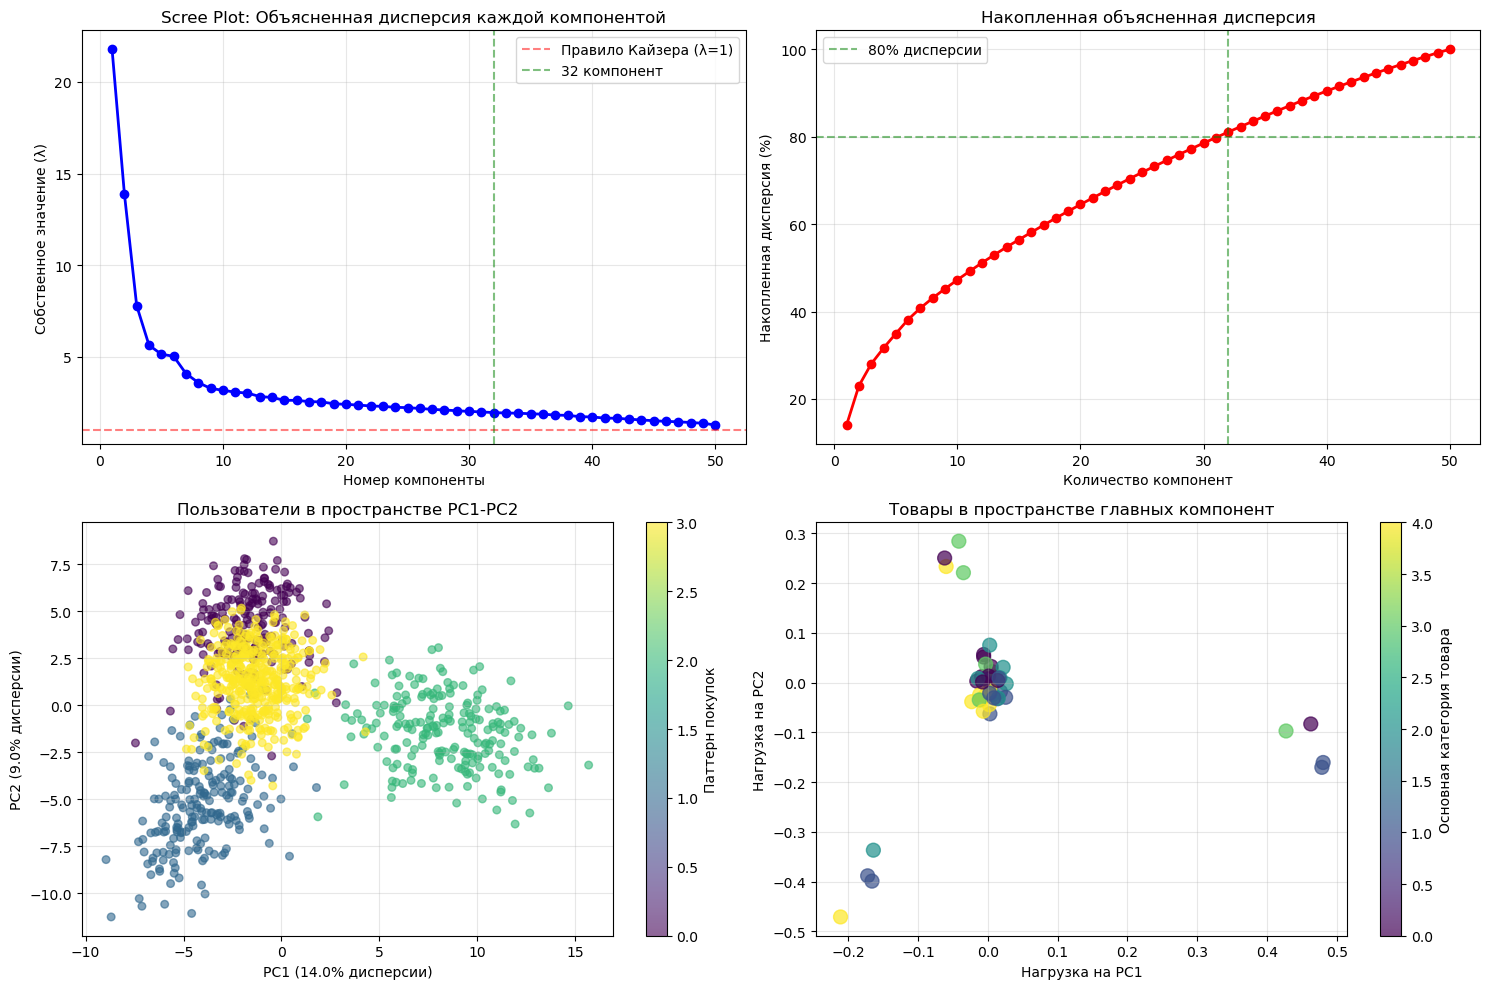

In [50]:
# 6. Визуализация
plt.figure(figsize=(15, 10))

# График 1: Объясненная дисперсия
plt.subplot(2, 2, 1)
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, 'bo-', linewidth=2)
plt.axhline(y=1, color='r', linestyle='--', alpha=0.5, label='Правило Кайзера (λ=1)')
plt.axvline(x=n_components, color='g', linestyle='--', alpha=0.5, label=f'{n_components} компонент')
plt.xlabel('Номер компоненты')
plt.ylabel('Собственное значение (λ)')
plt.title('Scree Plot: Объясненная дисперсия каждой компонентой')
plt.legend()
plt.grid(True, alpha=0.3)

# График 2: Накопленная дисперсия
plt.subplot(2, 2, 2)
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance*100, 'ro-', linewidth=2)
plt.axhline(y=80, color='g', linestyle='--', alpha=0.5, label='80% дисперсии')
plt.axvline(x=n_components, color='g', linestyle='--', alpha=0.5)
plt.xlabel('Количество компонент')
plt.ylabel('Накопленная дисперсия (%)')
plt.title('Накопленная объясненная дисперсия')
plt.legend()
plt.grid(True, alpha=0.3)

# График 3: Первые две главные компоненты
plt.subplot(2, 2, 3)
# Раскрасим пользователей по их основному паттерну покупок
user_patterns = np.zeros(n_users)
user_patterns[:200] = 0  # Электроника
user_patterns[200:400] = 1  # Книги
user_patterns[400:600] = 2  # Одежда
user_patterns[600:] = 3  # Смешанный

scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], 
                     c=user_patterns, cmap='viridis', alpha=0.6, s=30)
plt.xlabel(f'PC1 ({eigenvalues[0]/eigenvalues.sum()*100:.1f}% дисперсии)')
plt.ylabel(f'PC2 ({eigenvalues[1]/eigenvalues.sum()*100:.1f}% дисперсии)')
plt.title('Пользователи в пространстве PC1-PC2')
plt.colorbar(scatter, label='Паттерн покупок')
plt.grid(True, alpha=0.3)

# График 4: Товары в пространстве главных компонент
plt.subplot(2, 2, 4)
# Нагрузки товаров на первые две компоненты
product_loadings = principal_components[:, :2]

# Раскрасим товары по основным категориям
product_cat_idx = np.argmax(product_categories, axis=1)

scatter2 = plt.scatter(product_loadings[:, 0], product_loadings[:, 1],
                      c=product_cat_idx, alpha=0.7, s=100)
plt.xlabel('Нагрузка на PC1')
plt.ylabel('Нагрузка на PC2')
plt.title('Товары в пространстве главных компонент')
plt.colorbar(scatter2, label='Основная категория товара')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [51]:
# 7. Интерпретация главных компонент
print( "="*60)
print("ИНТЕРПРЕТАЦИЯ ГЛАВНЫХ КОМПОНЕНТ:")

# Анализируем самые важные товары для каждой компоненты
for i in range(min(3, n_components)):
    print(f"(λ{i+1}={eigenvalues[i]:.2f}, {eigenvalues[i]/eigenvalues.sum()*100:.1f}%):")
    
    # Находим товары с наибольшими нагрузками
    loadings = eigenvectors[:, i]
    top_indices = np.argsort(np.abs(loadings))[::-1][:5]
    
    print("Товары с наибольшим влиянием:")
    for idx in top_indices:
        sign = "+" if loadings[idx] > 0 else "-"
        print(f"  {sign} {product_names[idx]} (loading: {loadings[idx]:.3f})")
    
    # Интерпретируем компоненту
    if i == 0:
        print("  Интерпретация: Общая активность покупок")
    elif i == 1:
        print("  Интерпретация: Контраст 'Электроника' vs 'Книги'")
    elif i == 2:
        print("  Интерпретация: 'Одежда и мода'")

ИНТЕРПРЕТАЦИЯ ГЛАВНЫХ КОМПОНЕНТ:
(λ1=21.79, 14.0%):
Товары с наибольшим влиянием:
  + Product_044 (loading: 0.480)
  + Product_046 (loading: 0.478)
  + Product_040 (loading: 0.463)
  + Product_042 (loading: 0.427)
  - Product_030 (loading: -0.211)
  Интерпретация: Общая активность покупок
(λ2=13.90, 9.0%):
Товары с наибольшим влиянием:
  - Product_030 (loading: -0.471)
  - Product_035 (loading: -0.399)
  - Product_020 (loading: -0.388)
  - Product_025 (loading: -0.337)
  + Product_010 (loading: 0.284)
  Интерпретация: Контраст 'Электроника' vs 'Книги'
(λ3=7.78, 5.0%):
Товары с наибольшим влиянием:
  + Product_000 (loading: 0.532)
  + Product_015 (loading: 0.389)
  + Product_010 (loading: 0.380)
  + Product_005 (loading: 0.290)
  + Product_020 (loading: 0.236)
  Интерпретация: 'Одежда и мода'


In [52]:
# 8.поиск похожих пользователей
print("="*60)
print("ПОИСК ПОХОЖИХ ПОЛЬЗОВАТЕЛЕЙ")
# Выбираем случайного пользователя
target_user_idx = 12  # Пользователь из "электронного" кластера
target_user_reduced = X_reduced[target_user_idx]

# Ищем ближайших соседей в уменьшенном пространстве
from scipy.spatial.distance import cdist
distances = cdist([target_user_reduced], X_reduced, metric='euclidean')[0]

# Топ-5 похожих пользователей (исключая самого себя)
similar_indices = np.argsort(distances)[1:6]

print(f"Целевой пользователь: {user_ids[target_user_idx]}")
print("Самые похожие пользователи (в уменьшенном пространстве):")
for i, idx in enumerate(similar_indices):
    print(f"  {i+1}. {user_ids[idx]} (расстояние: {distances[idx]:.3f})")

# 9. Сравнение с исходным пространством
print("="*60)
print("СРАВНЕНИЕ ЭФФЕКТИВНОСТИ:")

# Вычисляем объем памяти
original_size = purchase_matrix.shape[0] * purchase_matrix.shape[1] * 8  # байты
reduced_size = purchase_matrix.shape[0] * n_components * 8  # байты

print(f"Исходные данные: {original_size / 1024:.1f} KB")
print(f"После PCA: {reduced_size / 1024:.1f} KB")
print(f"Экономия памяти: {(1 - reduced_size/original_size)*100:.1f}%")

ПОИСК ПОХОЖИХ ПОЛЬЗОВАТЕЛЕЙ
Целевой пользователь: User_0012
Самые похожие пользователи (в уменьшенном пространстве):
  1. User_0043 (расстояние: 9.665)
  2. User_0050 (расстояние: 10.055)
  3. User_0112 (расстояние: 10.204)
  4. User_0105 (расстояние: 10.252)
  5. User_0106 (расстояние: 10.378)
СРАВНЕНИЕ ЭФФЕКТИВНОСТИ:
Исходные данные: 390.6 KB
После PCA: 250.0 KB
Экономия памяти: 36.0%


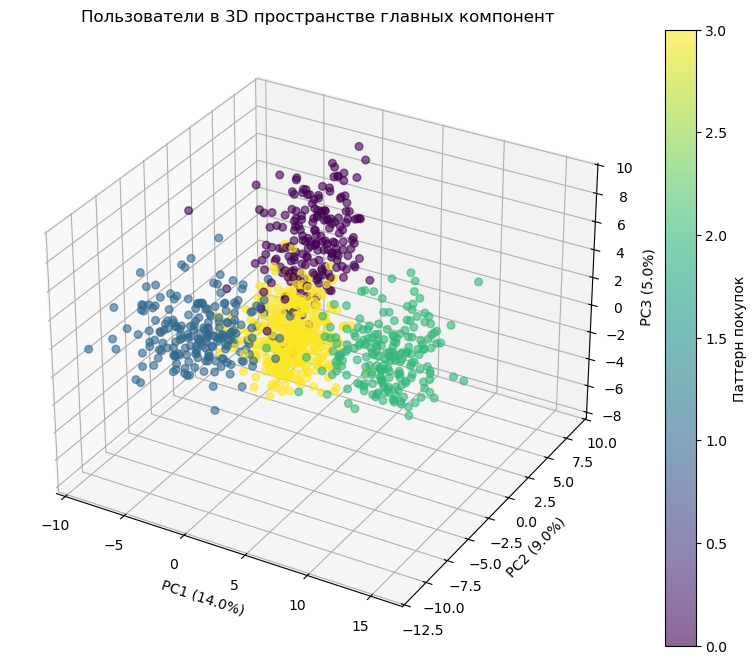

In [53]:
# 10. Визуализация кластеров в 3D (если n_components >= 3)
if n_components >= 3:
    from mpl_toolkits.mplot3d import Axes3D
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2],
                        c=user_patterns, cmap='viridis', alpha=0.6, s=30)
    
    ax.set_xlabel(f'PC1 ({eigenvalues[0]/eigenvalues.sum()*100:.1f}%)')
    ax.set_ylabel(f'PC2 ({eigenvalues[1]/eigenvalues.sum()*100:.1f}%)')
    ax.set_zlabel(f'PC3 ({eigenvalues[2]/eigenvalues.sum()*100:.1f}%)')
    ax.set_title('Пользователи в 3D пространстве главных компонент')
    plt.colorbar(scatter, label='Паттерн покупок')
    
    plt.show()

In [54]:


# Скорость вычислений

# Косинусное сходство в исходном пространстве
start = time.time()
similarities_full = purchase_matrix @ purchase_matrix.T
time_full = time.time() - start

# Косинусное сходство в уменьшенном пространстве
start = time.time()
similarities_reduced = X_reduced @ X_reduced.T
time_reduced = time.time() - start

print(f"Скорость вычисления матрицы сходства:")
print(f"Исходное пространство: {time_full:.4f} сек")
print(f"Уменьшенное пространство: {time_reduced:.4f} сек")
print(f"Ускорение: {time_full/time_reduced:.1f}×")

Скорость вычисления матрицы сходства:
Исходное пространство: 0.1064 сек
Уменьшенное пространство: 0.0110 сек
Ускорение: 9.7×
